In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
plt.style.use("ggplot")

In [3]:
import sklearn
from sklearn.decomposition import TruncatedSVD

In [4]:
amazon_ratings = pd.read_csv('ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [5]:
amazon_ratings.shape


(2023070, 4)

In [6]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<AxesSubplot:xlabel='ProductId'>

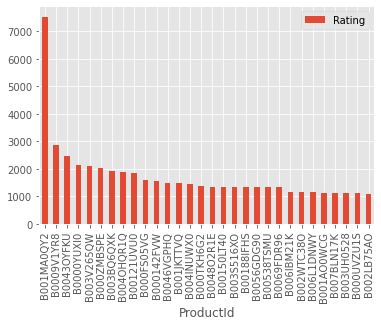

In [7]:
most_popular.head(30).plot(kind = "bar")

In [8]:
amazon_ratings1 = amazon_ratings.head(10000)

In [9]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
ratings_utility_matrix.shape

(9697, 886)

In [11]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X.shape

(886, 9697)

In [13]:
X1 = X

In [14]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape


(886, 10)

In [15]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [16]:
X.index[99]

'6117036094'

In [17]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [18]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [19]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0205616461',
 '0558925278',
 '1304139212',
 '130414643X',
 '1304174905',
 '1304511154',
 '1304622452',
 '1304622622',
 '1304622657']

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [21]:
product_descriptions = pd.read_csv('data.csv',encoding='unicode_escape')
product_descriptions.shape

(541909, 8)

In [22]:
product_descriptions = product_descriptions.dropna()

In [23]:
product_descriptions1 = product_descriptions.head(500)

In [24]:
product_descriptions1["Description"].head(10)

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
5           SET 7 BABUSHKA NESTING BOXES
6      GLASS STAR FROSTED T-LIGHT HOLDER
7                 HAND WARMER UNION JACK
8              HAND WARMER RED POLKA DOT
9          ASSORTED COLOUR BIRD ORNAMENT
Name: Description, dtype: object

In [25]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["Description"])
X1

<500x492 sparse matrix of type '<class 'numpy.float64'>'
	with 2072 stored elements in Compressed Sparse Row format>

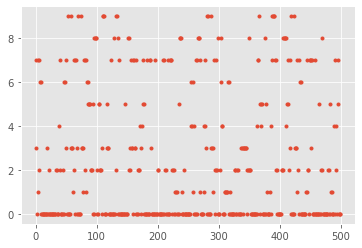

In [26]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [27]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [28]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 sign
 metal
 design
 hand
 building
 word
 block
 warmer
 ribbons
 dog
Cluster 1:
 frame
 wooden
 white
 antique
 cornice
 picture
 photo
 finish
 dominoes
 organiser
Cluster 2:
 heart
 white
 holder
 hanging
 light
 lantern
 small
 metal
 wood
 finish
Cluster 3:
 cream
 coat
 hearts
 rack
 cupid
 hanger
 enamel
 paris
 fashion
 bucket
Cluster 4:
 assorted
 cake
 cases
 pack
 colour
 clock
 fairy
 mug
 72
 retrospot
Cluster 5:
 pink
 polkadot
 paisley
 blue
 pack
 bag
 umbrella
 toy
 tissues
 jumbo
Cluster 6:
 bag
 lunch
 jumbo
 retrospot
 design
 box
 girl
 dolly
 red
 black
Cluster 7:
 set
 vintage
 billboard
 making
 boxes
 mug
 jam
 nesting
 babushka
 paper
Cluster 8:
 red
 parasol
 edwardian
 retrospot
 warmer
 hand
 polka
 dot
 clock
 alarm
Cluster 9:
 hot
 bottle
 water
 union
 jack
 knitted
 warmer
 hand
 flag
 sympathy


C:\Users\upsho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0])

In [30]:
show_recommendations("cream")

Cluster 3:
 cream
 coat
 hearts
 rack
 cupid
 hanger
 enamel
 paris
 fashion
 bucket


In [31]:
from sklearn.metrics import accuracy_score
import joblib
#accuracy = accuracy_score(X,y_kmeans)   

In [32]:
joblib.dump(show_recommendations,'ml_recommendor_model.joblib')

['ml_recommendor_model.joblib']

In [33]:
joblib.dump(print_cluster,'ml_recommendor.joblib')

['ml_recommendor.joblib']

In [34]:
loaded_model = joblib.load('ml_recommendor.joblib')



In [35]:
print(print_cluster(i))


Cluster 9:
 hot
 bottle
 water
 union
 jack
 knitted
 warmer
 hand
 flag
 sympathy
None
